In [212]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer
import optuna

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.metrics import RootMeanSquaredError

In [213]:
data = pd.read_csv("Performa_Siswa_Anime(Train).csv")
data

Nama  Jam_Belajar  Kehadiran Keterlibatan_Orangtua  \
0                  Elner          NaN       84.0                   Low   
1             Male Staff         19.0        NaN                   Low   
2          Bangai ROGIRI         24.0       98.0                Medium   
3                 Pakkun         29.0       89.0                   Low   
4        Cole MOZELEEMAY          NaN       92.0                Medium   
...                  ...          ...        ...                   ...   
6373               Akama         25.0       69.0                  High   
6374       Mitsuko SAKAI         23.0       76.0                  High   
6375           Chen Ting         20.0       90.0                Medium   
6376     Christhald BALZ         10.0       86.0                  High   
6377  Fortune's Director         15.0       67.0                Medium   

     Akses_ke_Sumber_Daya Kegiatan_Ekstrakurikuler  Jam_Tidur  \
0                    High                       No        7.0   
1                  Medium                       No        8.0   
2                  Medium                      Yes        7.0   
3                  Medium                      Yes        8.0   
4                  Medium                      Yes        6.0   
...                   ...                      ...        ...   
6373               Medium                       No        7.0   
6374               Medium                       No        8.0   
6375                  Low                      Yes        6.0   
6376                 High                      Yes        6.0   
6377                  Low                      Yes        9.0   

      Nilai_Sebelumnya Tingkat_Motivasi Akses_Internet  Sesi_Bimbingan  \
0                  NaN              Low            Yes               0   
1                  NaN              Low            Yes               2   
2                  NaN           Medium            Yes               2   
3                 98.0           Medium            Yes               1   
4                 65.0           Medium            Yes               3   
...                ...              ...            ...             ...   
6373               NaN           Medium            Yes               1   
6374              81.0           Medium            Yes               3   
6375               NaN              Low            Yes               3   
6376               NaN             High            Yes               2   
6377              94.0           Medium            Yes               0   

     Pendapatan_Keluarga Kualitas_Guru Jenis_Sekolah Pengaruh_Teman  \
0                    NaN        Medium        Public       Positive   
1                 Medium        Medium        Public       Negative   
2                    NaN        Medium        Public        Neutral   
3                 Medium        Medium        Public       Negative   
4                 Medium          High        Public        Neutral   
...                  ...           ...           ...            ...   
6373                High        Medium        Public       Positive   
6374                 NaN          High        Public       Positive   
6375                 NaN        Medium        Public       Negative   
6376                 Low        Medium       Private       Positive   
6377                 NaN        Medium        Public       Positive   

      Aktivitas_Fisik Kesulitan_Belajar Tingkat_Pendidikan_Orangtua  \
0                   3                No                 High School   
1                   4                No                     College   
2                   4                No                Postgraduate   
3                   4                No                 High School   
4                   4                No                     College   
...               ...               ...                         ...   
6373                2                No                 High School   
6374                2                No 

In [214]:
test = pd.read_csv('Performa_Siswa_Anime(Test).csv')
test

Nama  Jam_Belajar  Kehadiran  \
0                           Ouzen (オーゼン)         20.0         77   
1               Yuigahama, Yui (由比ヶ浜 結衣)         28.0         95   
2                              Hiei (飛影)         21.0         85   
3                              Dabi (荼毘)         16.0         87   
4       Nikiforov, Victor (ヴィクトル・ニキフォロフ)         24.0         80   
...                                  ...          ...        ...   
1037             Saotome, Mary (早乙女 芽亜里)         16.0         81   
1038              Aoyama, Nanami (青山 七海)         19.0         64   
1039                           Tobi (トビ)         20.0         61   
1040  Evans, Soul Eater (ソウル・イーター・エヴァンス)         15.0         96   
1041             Tsunemori, Akane (常守 朱)         21.0         97   

     Keterlibatan_Orangtua Akses_ke_Sumber_Daya Kegiatan_Ekstrakurikuler  \
0                   Medium                 High                      Yes   
1                   Medium               Medium                      Yes   
2                   Medium                 High                      Yes   
3                     High               Medium                      Yes   
4                     High               Medium                      Yes   
...                    ...                  ...                      ...   
1037                Medium               Medium                       No   
1038                  High               Medium                      Yes   
1039                Medium               Medium                       No   
1040                  High               Medium                       No   
1041                Medium                 High                       No   

      Jam_Tidur  Nilai_Sebelumnya Tingkat_Motivasi Akses_Internet  \
0             7                53           Medium            Yes   
1             8                80           Medium            Yes   
2             5                53           Medium            Yes   
3             7                79           Medium            Yes   
4             7                72           Medium             No   
...         ...               ...              ...            ...   
1037          9                61           Medium            NaN   
1038          8                59           Medium            Yes   
1039          7                71             High            Yes   
1040          7                94              Low             No   
1041          8                54             High            Yes   

      Sesi_Bimbingan Pendapatan_Keluarga Kualitas_Guru Jenis_Sekolah  \
0                  1                 Low        Medium        Public   
1                  0                 NaN        Medium       Private   
2                  2                 Low        Medium       Private   
3                  1                 Low        Medium        Public   
4                  2              Medium        Medium        Public   
...              ...                 ...           ...           ...   
1037               3                High          High        Public   
1038               2                High        Medium       Private   
1039               2              Medium           Low        Public   
1040               3              Medium        Medium       Private   
1041               0                 Low           Low        Public   

     Pengaruh_Teman  Aktivitas_Fisik Kesulitan_Belajar  \
0          Positive                4                No   
1          Negative                2                No   
2           Neutral                3                No   
3           Neutral                4                No   
4           Neutral                3                No   
...             ...              ...               ...   
1037        Neutral                2                No   
1038       Positive                1                No   
1039       Positive                3                No   
1040        Neutral             

In [215]:
data['Kegiatan_Ekstrakurikuler'].unique()

array(['No', 'Yes'], dtype=object)

In [216]:
data.describe().T
#menunjukkan integer data type

count       mean        std   min   25%   50%   75%    max
Jam_Belajar       5424.0  19.994100   5.988276   1.0  16.0  20.0  24.0   44.0
Kehadiran         5791.0  80.006217  11.590269  60.0  70.0  80.0  90.0  100.0
Jam_Tidur         6104.0   7.030963   1.467388   4.0   6.0   7.0   8.0   10.0
Nilai_Sebelumnya  3764.0  75.172423  14.416686  50.0  63.0  75.0  88.0  100.0
Sesi_Bimbingan    6378.0   1.495296   1.233984   0.0   1.0   1.0   2.0    8.0
Aktivitas_Fisik   6378.0   2.972719   1.028926   0.0   2.0   3.0   4.0    6.0
Nilai_Ujian       6378.0  67.252117   3.914217  55.0  65.0  67.0  69.0  101.0

In [217]:
data.isnull().sum()

Nama                              0
Jam_Belajar                     954
Kehadiran                       587
Keterlibatan_Orangtua           348
Akses_ke_Sumber_Daya            124
Kegiatan_Ekstrakurikuler          0
Jam_Tidur                       274
Nilai_Sebelumnya               2614
Tingkat_Motivasi                  0
Akses_Internet                   54
Sesi_Bimbingan                    0
Pendapatan_Keluarga            2104
Kualitas_Guru                   841
Jenis_Sekolah                     0
Pengaruh_Teman                    0
Aktivitas_Fisik                   0
Kesulitan_Belajar               786
Tingkat_Pendidikan_Orangtua     119
Jarak_dari_Rumah                  0
Nilai_Ujian                       0
dtype: int64

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         6378 non-null   object 
 1   Jam_Belajar                  5424 non-null   float64
 2   Kehadiran                    5791 non-null   float64
 3   Keterlibatan_Orangtua        6030 non-null   object 
 4   Akses_ke_Sumber_Daya         6254 non-null   object 
 5   Kegiatan_Ekstrakurikuler     6378 non-null   object 
 6   Jam_Tidur                    6104 non-null   float64
 7   Nilai_Sebelumnya             3764 non-null   float64
 8   Tingkat_Motivasi             6378 non-null   object 
 9   Akses_Internet               6324 non-null   object 
 10  Sesi_Bimbingan               6378 non-null   int64  
 11  Pendapatan_Keluarga          4274 non-null   object 
 12  Kualitas_Guru                5537 non-null   object 
 13  Jenis_Sekolah     

## Handle missing value

In [219]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[['Jam_Belajar', 'Kehadiran']] = imputer.fit_transform(data[['Jam_Belajar', 'Kehadiran']])


In [220]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
test[['Jam_Belajar', 'Kehadiran']] = imputer.fit_transform(test[['Jam_Belajar', 'Kehadiran']])


In [221]:
data['Jam_Tidur'].fillna(data['Jam_Tidur'].median(), inplace=True)

In [222]:
test['Jam_Tidur'].fillna(test['Jam_Tidur'].median(), inplace=True)

In [ ]:
# data['Jam_Belajar'].fillna(data['Jam_Belajar'].median(), inplace=True)

In [ ]:
# test['Jam_Belajar'].fillna(test['Jam_Belajar'].median(), inplace=True)

In [225]:
# Daftar kolom yang ingin dicek distribusi kategorinya
kolom_kategorikal = ['Keterlibatan_Orangtua', 'Akses_ke_Sumber_Daya', 'Kualitas_Guru']

# Loop untuk menghitung dan mencetak jumlah dan persentase tiap kategori di setiap kolom
for kolom in kolom_kategorikal:
    print("\nProporsi kategori (persentase):")
    print(data[kolom].value_counts(normalize=True))  # Persentase setiap kategori



Proporsi kategori (persentase):
Keterlibatan_Orangtua
Medium    0.509453
High      0.286235
Low       0.204312
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Akses_ke_Sumber_Daya
Medium    0.502239
High      0.297729
Low       0.200032
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Kualitas_Guru
Medium    0.602312
High      0.295467
Low       0.102221
Name: proportion, dtype: float64


In [226]:
import numpy as np

# Proporsi untuk setiap kolom yang memiliki missing values
proporsi_kategori = {
    'Keterlibatan_Orangtua': {'Medium': 0.509453, 'High': 0.286235, 'Low': 0.204312},
    'Akses_ke_Sumber_Daya': {'Medium': 0.502239, 'High': 0.297729, 'Low': 0.200032},
    'Kualitas_Guru': {'Medium': 0.602312, 'High': 0.295467, 'Low': 0.102221}
}

# Function untuk imputasi berdasarkan proporsi
def fill_na_by_proportion(df, column, proportions):
    # Dapatkan nilai yang ada dan proporsinya
    values, probs = zip(*proportions.items())
    # Tentukan jumlah nilai yang perlu diisi
    n_missing = df[column].isna().sum()
    # Buat imputasi acak berdasarkan proporsi
    df.loc[df[column].isna(), column] = np.random.choice(values, size=n_missing, p=probs)

# Terapkan imputasi untuk setiap kolom yang memiliki missing values berdasarkan proporsinya
for col, prop in proporsi_kategori.items():
    fill_na_by_proportion(data, col, prop)


In [227]:
# Daftar kolom yang ingin dicek distribusi kategorinya
kolom_kategorikal = ['Keterlibatan_Orangtua', 'Akses_ke_Sumber_Daya', 'Kualitas_Guru']

# Loop untuk menghitung dan mencetak jumlah dan persentase tiap kategori di setiap kolom
for kolom in kolom_kategorikal:
    print("\nProporsi kategori (persentase):")
    print(test[kolom].value_counts(normalize=True))  # Persentase setiap kategori



Proporsi kategori (persentase):
Keterlibatan_Orangtua
Medium    0.533589
High      0.298464
Low       0.167946
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Akses_ke_Sumber_Daya
Medium    0.482726
High      0.364683
Low       0.152591
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Kualitas_Guru
Medium    0.635317
High      0.272553
Low       0.092131
Name: proportion, dtype: float64


In [228]:
import numpy as np

# Proporsi untuk setiap kolom yang memiliki missing values
proporsi_kategori = {
    'Keterlibatan_Orangtua': {'Medium': 0.533589, 'High': 0.298464, 'Low': 0.167946},
    'Akses_ke_Sumber_Daya': {'Medium': 0.482726, 'High': 0.364683, 'Low': 0.152591},
    'Kualitas_Guru': {'Medium': 0.635317, 'High': 0.272553, 'Low': 0.092131}
}

# Function untuk imputasi berdasarkan proporsi yang dinormalisasi
def fill_na_by_proportion(df, column, proportions):
    # Dapatkan nilai yang ada dan proporsi yang dinormalisasi
    values, probs = zip(*proportions.items())
    probs = np.array(probs) / np.sum(probs)  # Normalisasi sehingga totalnya menjadi 1
    # Tentukan jumlah nilai yang perlu diisi
    n_missing = df[column].isna().sum()
    # Buat imputasi acak berdasarkan proporsi
    df.loc[df[column].isna(), column] = np.random.choice(values, size=n_missing, p=probs)

# Terapkan imputasi untuk setiap kolom yang memiliki missing values berdasarkan proporsi yang dinormalisasi
for col, prop in proporsi_kategori.items():
    fill_na_by_proportion(test, col, prop)

In [229]:
# Daftar kolom yang ingin dicek distribusi kategorinya
kolom_kategorikal = ['Akses_Internet', 'Kesulitan_Belajar', 'Tingkat_Pendidikan_Orangtua']

# Loop untuk menghitung dan mencetak jumlah dan persentase tiap kategori di setiap kolom
for kolom in kolom_kategorikal:
    print("\nProporsi kategori (persentase):")
    print(data[kolom].value_counts(normalize=True))  # Persentase setiap kategori



Proporsi kategori (persentase):
Akses_Internet
Yes    0.923941
No     0.076059
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Kesulitan_Belajar
No     0.896996
Yes    0.103004
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Tingkat_Pendidikan_Orangtua
High School     0.495926
College         0.303403
Postgraduate    0.200671
Name: proportion, dtype: float64


In [230]:
# Proporsi untuk kolom biner
proporsi_biner = {
    'Akses_Internet': {'Yes': 0.923941, 'No': 0.076059},
    'Kesulitan_Belajar': {'No': 0.896996, 'Yes': 0.103004}
}

def fill_na_binary_by_proportion(df, column, proportions):
    values, probs = zip(*proportions.items())
    n_missing = df[column].isna().sum()
    df.loc[df[column].isna(), column] = np.random.choice(values, size=n_missing, p=probs)

# Isi missing values pada kolom biner
for col, prop in proporsi_biner.items():
    fill_na_binary_by_proportion(data, col, prop)


In [231]:
# Proporsi untuk 'Tingkat_Pendidikan_Orangtua'
proporsi_tingkat_pendidikan = {
    'High School': 0.495926,
    'College': 0.303403,
    'Postgraduate': 0.200671
}

# Isi missing values untuk kolom 'Tingkat_Pendidikan_Orangtua'
fill_na_binary_by_proportion(data, 'Tingkat_Pendidikan_Orangtua', proporsi_tingkat_pendidikan)


In [232]:
# Daftar kolom yang ingin dicek distribusi kategorinya
kolom_kategorikal = ['Akses_Internet', 'Kesulitan_Belajar', 'Tingkat_Pendidikan_Orangtua']

# Loop untuk menghitung dan mencetak jumlah dan persentase tiap kategori di setiap kolom
for kolom in kolom_kategorikal:
    print("\nProporsi kategori (persentase):")
    print(test[kolom].value_counts(normalize=True))  # Persentase setiap kategori



Proporsi kategori (persentase):
Akses_Internet
Yes    0.877193
No     0.122807
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Kesulitan_Belajar
No     0.923225
Yes    0.076775
Name: proportion, dtype: float64

Proporsi kategori (persentase):
Tingkat_Pendidikan_Orangtua
High School     0.426104
College         0.365643
Postgraduate    0.208253
Name: proportion, dtype: float64


In [233]:
# Proporsi untuk kolom biner
proporsi_biner = {
    'Akses_Internet': {'Yes': 0.877193, 'No': 0.122807},
    'Kesulitan_Belajar': {'No': 0.923225, 'Yes': 0.076775}
}

def fill_na_binary_by_proportion(df, column, proportions):
    values, probs = zip(*proportions.items())
    n_missing = df[column].isna().sum()
    df.loc[df[column].isna(), column] = np.random.choice(values, size=n_missing, p=probs)

# Isi missing values pada kolom biner
for col, prop in proporsi_biner.items():
    fill_na_binary_by_proportion(data, col, prop)


In [234]:
# Proporsi untuk 'Tingkat_Pendidikan_Orangtua'
proporsi_tingkat_pendidikan = {
    'High School': 0.426104,
    'College': 0.365643,
    'Postgraduate': 0.208253
}

# Isi missing values untuk kolom 'Tingkat_Pendidikan_Orangtua'
fill_na_binary_by_proportion(data, 'Tingkat_Pendidikan_Orangtua', proporsi_tingkat_pendidikan)


In [235]:
hasil_nama = test['Nama']
train_nilai = data['Nilai_Ujian']


data = data.drop(columns=['Nama'])
test = test.drop(columns=['Nama'])

In [236]:
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    non_null_values = data[col].dropna().unique()
    label_encoder.fit(non_null_values)  
    
    data[col] = data[col].apply(lambda x: label_encoder.transform([x])[0] if pd.notnull(x) else np.nan)
    test[col] = test[col].apply(lambda x: label_encoder.transform([x])[0] if pd.notnull(x) else np.nan)
    

In [237]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [238]:
test.isnull().sum()

Jam_Belajar                      0
Kehadiran                        0
Keterlibatan_Orangtua            0
Akses_ke_Sumber_Daya             0
Kegiatan_Ekstrakurikuler       247
Jam_Tidur                        0
Nilai_Sebelumnya                 0
Tingkat_Motivasi                 0
Akses_Internet                 130
Sesi_Bimbingan                   0
Pendapatan_Keluarga            169
Kualitas_Guru                    0
Jenis_Sekolah                    0
Pengaruh_Teman                 151
Aktivitas_Fisik                  0
Kesulitan_Belajar                0
Tingkat_Pendidikan_Orangtua      0
Jarak_dari_Rumah                 0
dtype: int64

## 

In [239]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}
# dict untuk nge map colom untuk panjang dari unik values

{}

In [240]:
# def kolom_binary(data, column):
#     if data[column].isin(["Yes", "No"]).all():
#         # Jika kolom hanya berisi "Yes" atau "No"
#         return data[column].apply(lambda x: 1 if x == "Yes" else 0)
#     elif data[column].isin(["Public", "Private"]).all():
#         # Jika kolom hanya berisi "Public" atau "Private"
#         return data[column].apply(lambda x: 1 if x == "Public" else 0)
#     else:
#         raise ValueError("Kolom memiliki nilai yang tidak diharapkan.")


In [241]:
# data["Kegiatan_Ekstrakurikuler"] = kolom_binary(data, "Kegiatan_Ekstrakurikuler")
# data["Akses_Internet"] = kolom_binary(data, "Akses_Internet")
# data["Jenis_Sekolah"] = kolom_binary(data, "Jenis_Sekolah")
# data["Kesulitan_Belajar"] = kolom_binary(data, "Kesulitan_Belajar")

In [242]:
data.describe().T

count       mean        std   min   25%   50%  \
Jam_Belajar                  6378.0  20.123720   5.595551   1.0  17.0  20.0   
Kehadiran                    6378.0  80.062863  11.155772  60.0  71.0  80.0   
Keterlibatan_Orangtua        6378.0   1.221386   0.864272   0.0   0.0   2.0   
Akses_ke_Sumber_Daya         6378.0   1.204139   0.871212   0.0   0.0   2.0   
Kegiatan_Ekstrakurikuler     6378.0   0.596896   0.490560   0.0   0.0   1.0   
Jam_Tidur                    6378.0   7.029633   1.435531   4.0   6.0   7.0   
Nilai_Sebelumnya             3764.0  75.172423  14.416686  50.0  63.0  75.0   
Tingkat_Motivasi             6378.0   1.307306   0.783201   0.0   1.0   2.0   
Akses_Internet               6378.0   0.923487   0.265838   0.0   1.0   1.0   
Sesi_Bimbingan               6378.0   1.495296   1.233984   0.0   1.0   1.0   
Pendapatan_Keluarga          4274.0   1.211979   0.747247   0.0   1.0   1.0   
Kualitas_Guru                6378.0   1.309188   0.896238   0.0   0.0   2.0   
Jenis_Sekolah                6378.0   0.695202   0.460358   0.0   0.0   1.0   
Pengaruh_Teman               6378.0   1.191753   0.756394   0.0   1.0   1.0   
Aktivitas_Fisik              6378.0   2.972719   1.028926   0.0   2.0   3.0   
Kesulitan_Belajar            6378.0   0.103794   0.305017   0.0   0.0   0.0   
Tingkat_Pendidikan_Orangtua  6378.0   0.897774   0.702529   0.0   0.0   1.0   
Jarak_dari_Rumah             6378.0   1.496237   0.670442   0.0   1.0   2.0   
Nilai_Ujian                  6378.0  67.252117   3.914217  55.0  65.0  67.0   

                              75%    max  
Jam_Belajar                  24.0   44.0  
Kehadiran                    89.0  100.0  
Keterlibatan_Orangtua         2.0    2.0  
Akses_ke_Sumber_Daya          2.0    2.0  
Kegiatan_Ekstrakurikuler      1.0    1.0  
Jam_Tidur                     8.0   10.0  
Nilai_Sebelumnya             88.0  100.0  
Tingkat_Motivasi              2.0    2.0  
Akses_Internet                1.0    1.0  
Sesi_Bimbingan                2.0    8.0  
Pendapatan_Keluarga           2.0    2.0  
Kualitas_Guru                 2.0    2.0  
Jenis_Sekolah                 1.0    1.0  
Pengaruh_Teman                2.0    2.0  
Aktivitas_Fisik               4.0    6.0  
Kesulitan_Belajar             0.0    1.0  
Tingkat_Pendidikan_Orangtua   1.0    2.0  
Jarak_dari_Rumah              2.0    2.0  
Nilai_Ujian                  69.0  101.0

In [243]:
print(data.Jenis_Sekolah.unique())

[1 0]


## Lanjot

In [244]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

print("categorical variables:")
print(cat_cols)

print("numerical catagories:")
print(num_cols)

categorical variables:
Index([], dtype='object')
numerical catagories:
['Jam_Belajar', 'Kehadiran', 'Keterlibatan_Orangtua', 'Akses_ke_Sumber_Daya', 'Kegiatan_Ekstrakurikuler', 'Jam_Tidur', 'Nilai_Sebelumnya', 'Tingkat_Motivasi', 'Akses_Internet', 'Sesi_Bimbingan', 'Pendapatan_Keluarga', 'Kualitas_Guru', 'Jenis_Sekolah', 'Pengaruh_Teman', 'Aktivitas_Fisik', 'Kesulitan_Belajar', 'Tingkat_Pendidikan_Orangtua', 'Jarak_dari_Rumah', 'Nilai_Ujian']


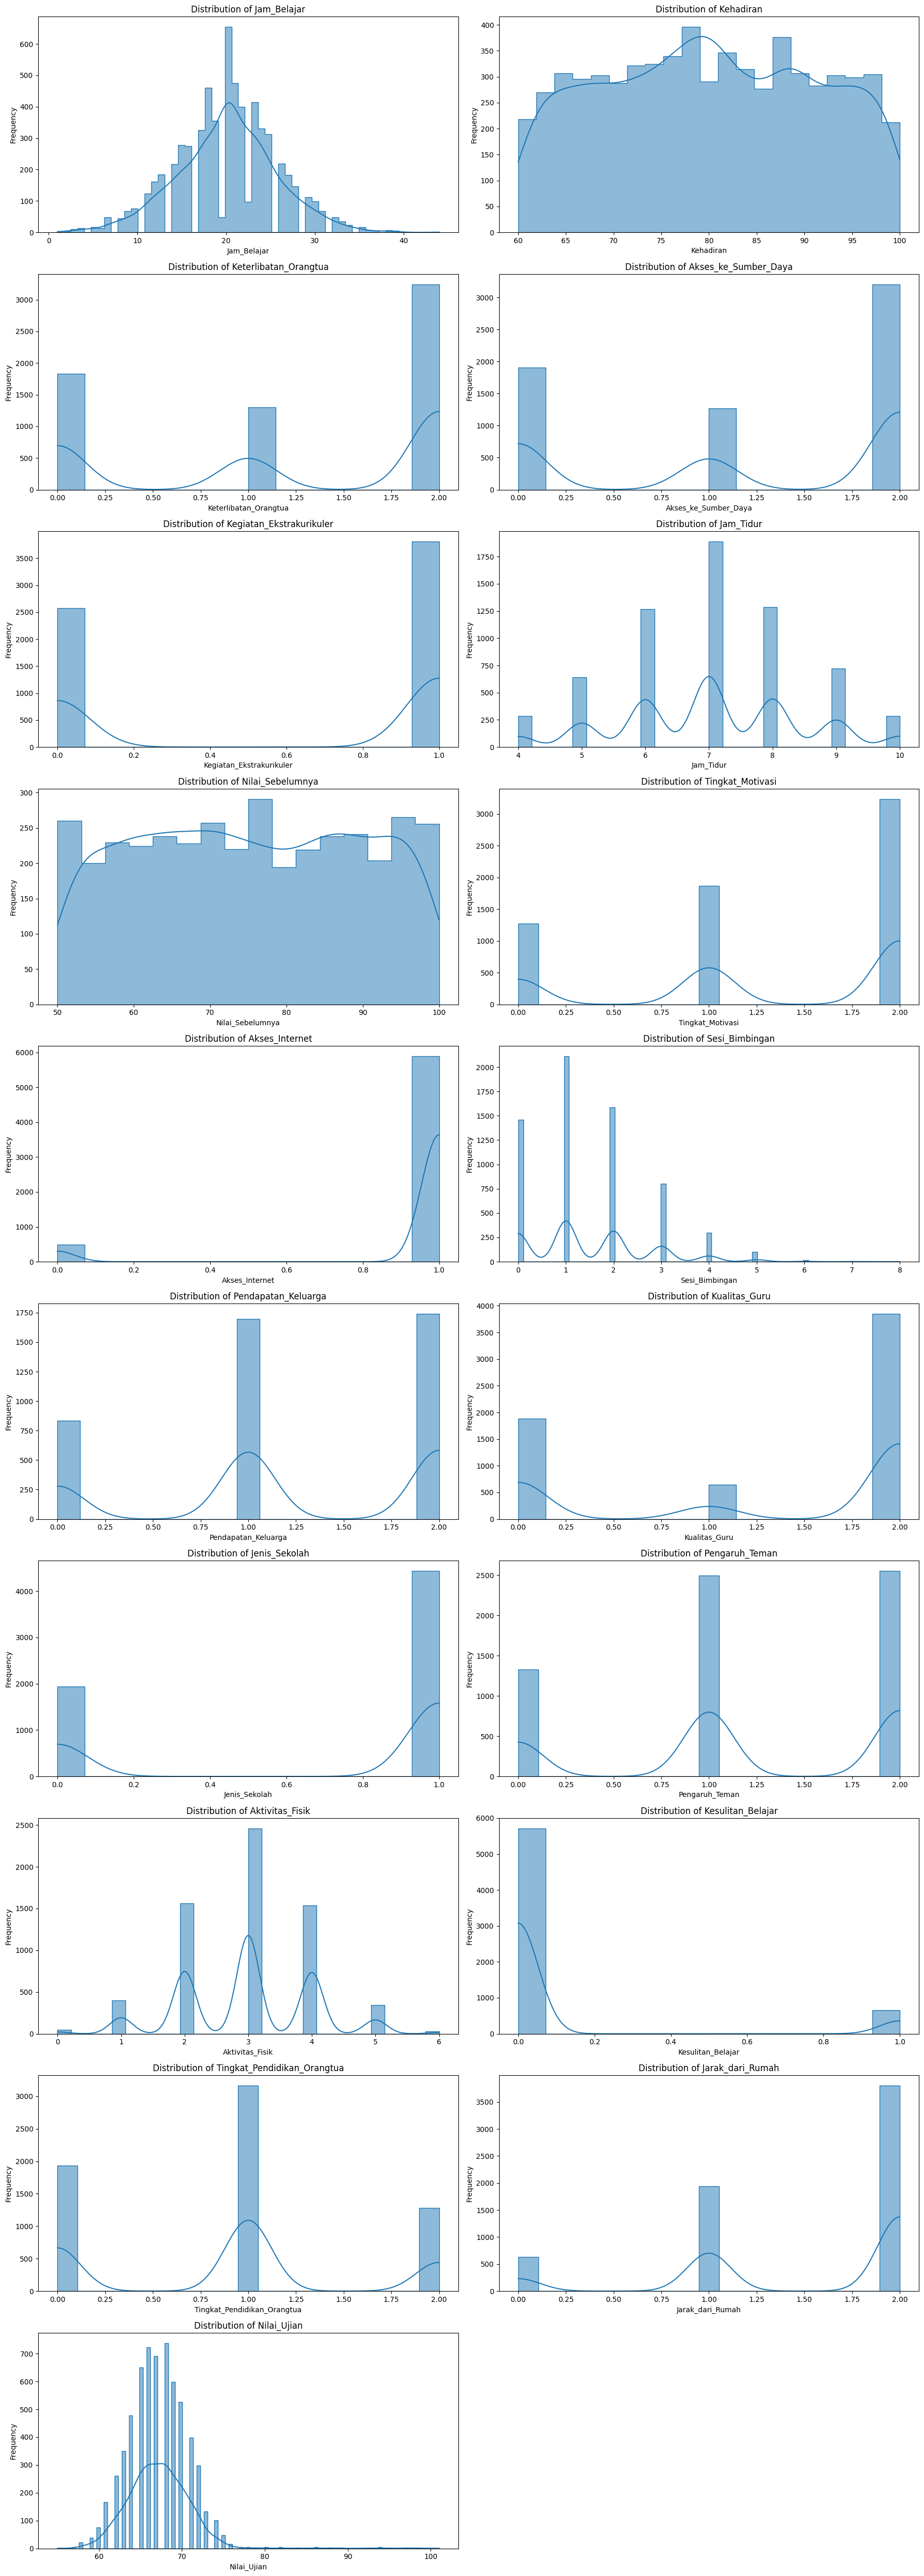

In [245]:
n_cols = 2
n_rows = (len(num_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=data, x=column, kde=True, element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [246]:
import plotly.subplots as sp
import plotly.graph_objects as go

for col in num_cols:
    print(col)
    print("Skew:", round(data[col].skew(), 2))
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Histogram", "Box Plot"))
    trace1 = go.Histogram(x=data[col], name="Histogram", nbinsx=40)
    fig.add_trace(trace1, row=1, col=1)
    trace2 = go.Box(y=data[col], name="Box Plot", boxpoints="outliers")
    fig.add_trace(trace2, row=1, col=2)
    fig.update_layout(showlegend=False, title_text=f"Distribution of {col}")
    fig.show()

Jam_Belajar
Skew: -0.06


Kehadiran
Skew: 0.0


Keterlibatan_Orangtua
Skew: -0.44


Akses_ke_Sumber_Daya
Skew: -0.41


Kegiatan_Ekstrakurikuler
Skew: -0.4


Jam_Tidur
Skew: -0.02


Nilai_Sebelumnya
Skew: 0.0


Tingkat_Motivasi
Skew: -0.6


Akses_Internet
Skew: -3.19


Sesi_Bimbingan
Skew: 0.83


Pendapatan_Keluarga
Skew: -0.37


Kualitas_Guru
Skew: -0.65


Jenis_Sekolah
Skew: -0.85


Pengaruh_Teman
Skew: -0.33


Aktivitas_Fisik
Skew: -0.04


Kesulitan_Belajar
Skew: 2.6


Tingkat_Pendidikan_Orangtua
Skew: 0.14


Jarak_dari_Rumah
Skew: -0.98


Nilai_Ujian
Skew: 1.67


### Heatmap & Correlation

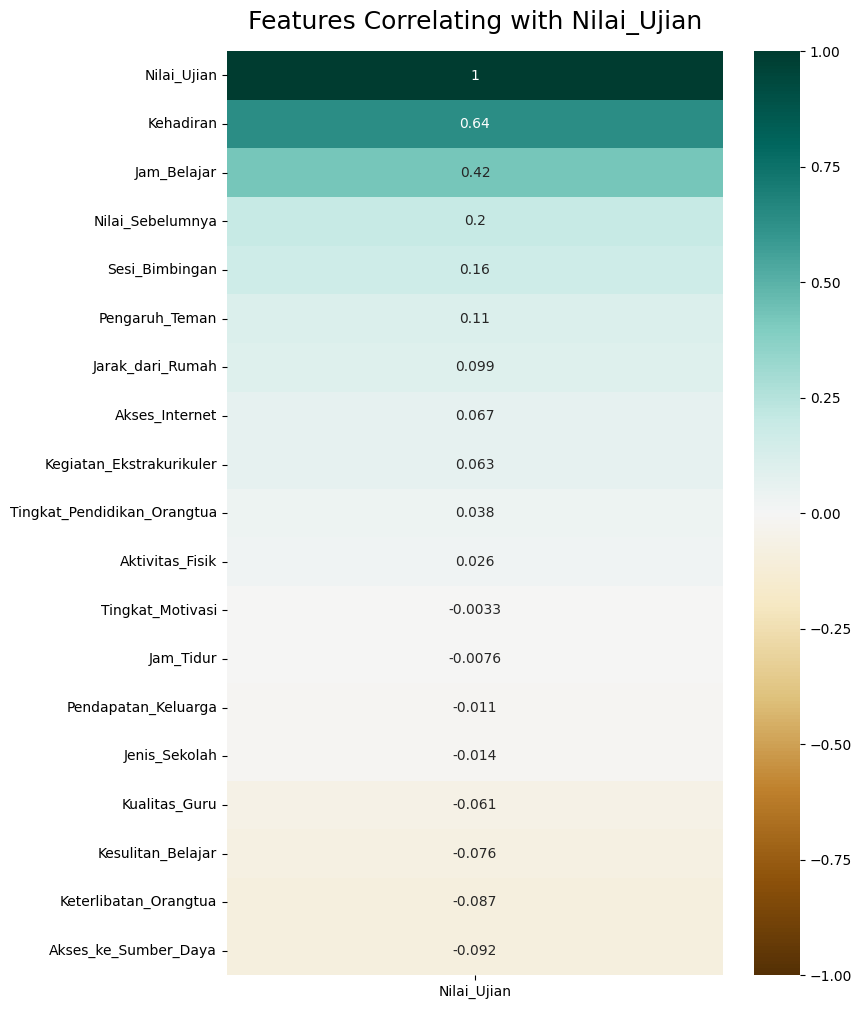

In [247]:
# Menghitung korelasi menggunakan metode Spearman
correlation_matrix = data.corr(method='spearman')

# Membuat heatmap untuk korelasi dengan 'Nilai_Ujian'
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlation_matrix[['Nilai_Ujian']].sort_values(by='Nilai_Ujian', ascending=False), 
                       vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Nilai_Ujian', fontdict={'fontsize': 18}, pad=16)
plt.show()

In [248]:
data = data.drop(columns=['Nilai_Sebelumnya', 'Pendapatan_Keluarga'])
test = test.drop(columns=['Nilai_Sebelumnya', 'Pendapatan_Keluarga'])

In [249]:
data['Nilai'] = train_nilai

In [250]:
X = data.drop(['Nilai_Ujian'], axis=1)
y = data['Nilai_Ujian']

random_state = 42

In [251]:
# Split data terlebih dahulu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=random_state)

### Scaling

In [252]:

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

scaler = QuantileTransformer()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print("Data dengan MinMaxScaler:\n", data_scaled.head())

Data dengan MinMaxScaler:
    Jam_Belajar  Kehadiran  Keterlibatan_Orangtua  Akses_ke_Sumber_Daya  \
0     0.672673   0.617618               0.388889                   0.0   
1     0.391391   0.483984               0.388889                   1.0   
2     0.773774   0.953453               1.000000                   1.0   
3     0.942442   0.743243               0.388889                   1.0   
4     0.290791   0.814314               1.000000                   1.0   

   Kegiatan_Ekstrakurikuler  Jam_Tidur  Tingkat_Motivasi  Akses_Internet  \
0                       0.0   0.491992          0.346346             1.0   
1                       0.0   0.740741          0.346346             1.0   
2                       1.0   0.491992          1.000000             1.0   
3                       1.0   0.740741          1.000000             1.0   
4                       1.0   0.244244          1.000000             1.0   

   Sesi_Bimbingan  Kualitas_Guru  Jenis_Sekolah  Pengaruh_Teman  \
0   

In [253]:
# # Fit dan transform hanya pada data training
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform data testing menggunakan scaler yang sudah difit
# X_test_scaled = scaler.transform(X_test)

In [254]:
import smogn
from smogn import smoter

try:
    data_resampled = smogn.smoter(data=data_scaled, y=y, 
                              k=9,  # positive integer (k < n)
                              samp_method='extreme',  # string ('balance' or 'extreme')
                              # phi relevance arguments
                              rel_thres=0.6,  # positive real number (0 < R < 1)
                              rel_method='auto',  # string ('auto' or 'manual')
                              rel_xtrm_type='both',  # string ('low' or 'both' or 'high')
                              rel_coef=2  # positive real number (0 < R)
                             )
    done = True
except:
    done = False

In [255]:
regressors = []
regressors.append(LinearRegression())
regressors.append(DecisionTreeRegressor(random_state=random_state))
regressors.append(RandomForestRegressor(random_state=random_state))
regressors.append(MLPRegressor(random_state=random_state))

kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

cv_results = []
for regressor in regressors:
    cv_result = cross_val_score(regressor, X_train, y_train, scoring="neg_root_mean_squared_error", cv=kfold, n_jobs=4)
    cv_results.append(np.abs(cv_result)) 

cv_means = [np.mean(cv_result) for cv_result in cv_results]
cv_std = [np.std(cv_result) for cv_result in cv_results]

cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,
    "Algorithm": ["Linear Regression", "Decision Tree", "Random Forest", "Neural Network"]
})

cv_res.sort_values(by='CrossValMeans', ascending=True)

CrossValMeans  CrossValErrors          Algorithm
0   9.469110e-15    6.902289e-15  Linear Regression
3   1.048960e-01    1.413571e-02     Neural Network
2   1.179296e-01    6.663555e-02      Random Forest
1   2.301668e-01    1.312079e-01      Decision Tree

In [256]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))  
model.add(Dense(1)) 
    
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 1666.7883 - root_mean_squared_error: 38.9010
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 13.2010 - root_mean_squared_error: 3.6291
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 6.4901 - root_mean_squared_error: 2.5401
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 2.6026 - root_mean_squared_error: 1.6093
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 1.0886 - root_mean_squared_error: 1.0420
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.5489 - root_mean_squared_error: 0.7403
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.2993 - root_mean_squared_error: 0.5465
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.1752 - root_mean_squared_error: 0.4176
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.0949 - root_mean_squared_error: 0.3078
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0619 - root_mean_square

In [261]:
test = pd.read_csv('Performa_Siswa_Anime(Test).csv')
test = test.drop(['Nama'], axis=1)

In [ ]:
import pandas as pd

# Scaling the test data
X_test_scaled = scaler.transform(X_test)

# Making predictions
predictions = model.predict(X_test_scaled)

# Creating a DataFrame with Nama_Siswa and predicted Nilai_Ujian
submission = pd.DataFrame({
    'Nama_Siswa': X_test['Nama_Siswa'],  # Assuming Nama_Siswa exists in X_test
    'Nilai_Ujian': predictions
})

# Display the submission DataFrame
submission.head()
